In [1]:
import pandas
import matplotlib
import numpy
import datetime
import pandas_datareader.data 
%matplotlib inline

In [2]:
# have to do the regression twice.. for buyers and sellers. and u want to know the most positive min in each instance.
# think about the information u have.. what is volatility like. what is volatility like in other currencies.
# what direction is it trend 15mins. 5mins. and 1min.
# what time of day is it.
# based on this what is the best time to hedge, if u want to avoid volatility. ie if it moves agst u... hold on. 
# if it doesnt move against u. cover in 1 min.
# results should be the same for buyers and sellers
# so what data do i want
# 1. time in hour bucket
# 2. standard deviation in 1 minute, 8 minute and 15 minute periods
# 3. price return in 1 minute, 8 minute and 15 minute periods
# 4. relative difference in standard deviation in 1 minute, 8 minute and 15 minute periods from eurusd and usdjpy
# 5. relative differences in price return in 1 minute, 8 minute and 15 minute periods from eurusd and usdjpy
# 6. what minute post trade is the price deviation, the most positive, the most negative, and the closest to zero
# use 1-5 to see their respective predictive powers for 6
# decision tree from 1-5 to pick most positive, most negative and closest to zero; this is the project goal

# so what do i need to do to get the data i want
# 1. import the eurusd and usdjpy price data
# 2. combine them with audusd price data
# 3. create a column which numbers each an hour from 0-23
# 4. create 9 columns which give the standard deviation in 1min, 8min and 15min for each currency
# 5. create 9 columns which give the preceding price return for each currency in 1min, 8min and 15min for each ccy
# 6. create 6 new columns which are the difference between aud SD and eur and jpy SD
# 7. create 6 new columns which are the difference between aud returns and eur and jpy returns
# 8. create 3 new columns which give the minute with the most positive, most negative and closest to zero aud returns

# then what regression.. i suspect random forest and decision tree

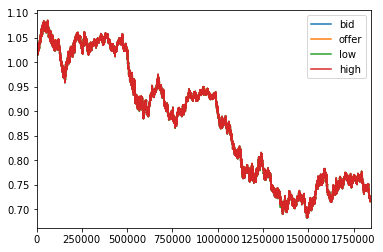

In [3]:
# import raw data; AUDUSD 1 min intervals

aud_1min_2012 = pandas.read_csv('ga_project/HIST DATA/DAT_MT_AUDUSD_M1_2012_edit.csv')
aud_1min_2013 = pandas.read_csv('ga_project/HIST DATA/DAT_MT_AUDUSD_M1_2013_edit.csv')
aud_1min_2014 = pandas.read_csv('ga_project/HIST DATA/DAT_MT_AUDUSD_M1_2014_edit.csv')
aud_1min_2015 = pandas.read_csv('ga_project/HIST DATA/DAT_MT_AUDUSD_M1_2015_edit.csv')
aud_1min_2016 = pandas.read_csv('ga_project/HIST DATA/DAT_MT_AUDUSD_M1_2016_edit.csv')

aud_data_pieces = (aud_1min_2012.iloc[::-1],aud_1min_2013.iloc[::-1],aud_1min_2014.iloc[::-1],
                    aud_1min_2015.iloc[::-1],aud_1min_2016.iloc[::-1])
aud_data = pandas.concat(aud_data_pieces, ignore_index = True)
aud_data.plot()

In [4]:
aud_data
hours = aud_data['time']
aud_hours = aud_data.ix[:, ['date','time']]
aud_hours

,date,time
0,2012.01.02,23:59
1,2012.01.02,23:58
2,2012.01.02,23:57
3,2012.01.02,23:56
4,2012.01.02,23:55
5,2012.01.02,23:54
6,2012.01.02,23:53
7,2012.01.02,23:51
8,2012.01.02,23:50
9,2012.01.02,23:49


In [5]:
# standard deviation

std2 = aud_data['low'].rolling(2).std()
std8 = aud_data['low'].rolling(8).std()
std15 = aud_data['low'].rolling(15).std()


In [6]:
# price returns

aud_datetime = aud_data.ix[:, ['date','time']]
aud_lows = aud_data.ix[:, ['low']]
aud_returns = aud_lows.pct_change()
aud_returns_data = pandas.concat([aud_datetime,aud_returns,aud_lows], axis=1)
aud_returns_data.columns = ['date','time','returns','price']



In [7]:
aud_datetime = aud_data.ix[:, ['date','time']]
aud_returns_data = pandas.concat([aud_datetime,aud_returns,aud_lows], axis=1)
aud_returns_data.columns = ['date','time','returns','price']
aud_price = aud_returns_data.ix[:, ['price']]
len(aud_price.columns)
aud_price1 = aud_price.price.shift(1)
aud_wlagged = pandas.concat([aud_returns_data,aud_price1], axis=1)
len(aud_wlagged.columns)
aud_price1 = aud_price.price.shift(1)
aud_price2 = aud_price.price.shift(2)
aud_price3 = aud_price.price.shift(3)
aud_price4 = aud_price.price.shift(4)
aud_price5 = aud_price.price.shift(5)
aud_price6 = aud_price.price.shift(6)
aud_price7 = aud_price.price.shift(7)
aud_price8 = aud_price.price.shift(8)
aud_price9 = aud_price.price.shift(9)
aud_price10 = aud_price.price.shift(10)
aud_price11 = aud_price.price.shift(11)
aud_price12 = aud_price.price.shift(12)
aud_price13 = aud_price.price.shift(13)
aud_price14 = aud_price.price.shift(14)

aud_wlagged = pandas.concat([aud_returns_data,aud_price1], axis=1)
aud_wlagged = pandas.concat([aud_returns_data, std2, std8, std15, aud_price1,aud_price2,aud_price3,aud_price4,
                                aud_price5,aud_price6,aud_price7,aud_price8,aud_price9,aud_price10,
                                 aud_price11,aud_price12,aud_price13,aud_price14], axis=1)


In [8]:
aud_wlagged.columns = ['date', 'time','returns','price','std2', 'std8', 'std15','1min','2min','3min','4min','5min','6min','7min','8min','9min',
                      '10min','11min','12min','13min','14min']


In [9]:
aud_wlagged[1] = aud_wlagged['price'] - aud_wlagged['1min']
aud_wlagged[2] = aud_wlagged['price'] - aud_wlagged['2min']
aud_wlagged[3] = aud_wlagged['price'] - aud_wlagged['3min']
aud_wlagged[4] = aud_wlagged['price'] - aud_wlagged['4min']
aud_wlagged[5] = aud_wlagged['price'] - aud_wlagged['5min']
aud_wlagged[6] = aud_wlagged['price'] - aud_wlagged['6min']
aud_wlagged[7] = aud_wlagged['price'] - aud_wlagged['7min']
aud_wlagged[8] = aud_wlagged['price'] - aud_wlagged['8min']
aud_wlagged[9] = aud_wlagged['price'] - aud_wlagged['9min']
aud_wlagged[10] = aud_wlagged['price'] - aud_wlagged['10min']
aud_wlagged[11] = aud_wlagged['price'] - aud_wlagged['11min']
aud_wlagged[12] = aud_wlagged['price'] - aud_wlagged['12min']
aud_wlagged[13] = aud_wlagged['price'] - aud_wlagged['13min']
aud_wlagged[14] = aud_wlagged['price'] - aud_wlagged['14min']


In [10]:
aud_wlagged['max'] = aud_wlagged[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].idxmax(axis=1)
aud_wlagged['min'] = aud_wlagged[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].idxmin(axis=1)
aud_wlagged

,date,time,returns,price,std2,std8,std15,1min,2min,3min,...,7,8,9,10,11,12,13,14,max,min
0,2012.01.02,23:59,NaN,1.02922,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012.01.02,23:58,-0.000010,1.02921,7.071068e-06,NaN,NaN,1.02922,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,2012.01.02,23:57,0.000029,1.02924,2.121320e-05,NaN,NaN,1.02921,1.02922,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,2012.01.02,23:56,-0.000165,1.02907,1.202082e-04,NaN,NaN,1.02924,1.02921,1.02922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
4,2012.01.02,23:55,-0.000019,1.02905,1.414214e-05,NaN,NaN,1.02907,1.02924,1.02921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
5,2012.01.02,23:54,-0.000136,1.02891,9.899495e-05,NaN,NaN,1.02905,1.02907,1.02924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
6,2012.01.02,23:53,-0.000019,1.02889,1.414214e-05,NaN,NaN,1.02891,1.02905,1.02907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0
7,2012.01.02,23:51,0.000010,1.02890,7.071068e-06,0.000150,NaN,1.02889,1.02891,1.02905,...,-0.00032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0
8,2012.01.02,23:50,0.000000,1.02890,0.000000e+00,0.000144,NaN,1.02890,1.02889,1.02891,...,-0.00031,-0.00032,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0
9,2012.01.02,23:49,-0.000029,1.02887,2.121320e-05,0.000130,NaN,1.02890,1.02890,1.02889,...,-0.00037,-0.00034,-0.00035,NaN,NaN,NaN,NaN,NaN,3.0,7.0


In [11]:

aud_wlagged[15] = (aud_wlagged['price']-aud_wlagged['1min']).abs()
aud_wlagged[16] = (aud_wlagged['price']-aud_wlagged['2min']).abs()
aud_wlagged[17] = (aud_wlagged['price']-aud_wlagged['3min']).abs()
aud_wlagged[18] = (aud_wlagged['price']-aud_wlagged['4min']).abs()
aud_wlagged[19] = (aud_wlagged['price']-aud_wlagged['5min']).abs()
aud_wlagged[20] = (aud_wlagged['price']-aud_wlagged['6min']).abs()
aud_wlagged[21] = (aud_wlagged['price']-aud_wlagged['7min']).abs()
aud_wlagged[22] = (aud_wlagged['price']-aud_wlagged['8min']).abs()
aud_wlagged[23] = (aud_wlagged['price']-aud_wlagged['9min']).abs()
aud_wlagged[24] = (aud_wlagged['price']-aud_wlagged['10min']).abs()
aud_wlagged[25] = (aud_wlagged['price']-aud_wlagged['11min']).abs()
aud_wlagged[26] = (aud_wlagged['price']-aud_wlagged['12min']).abs()
aud_wlagged[27] = (aud_wlagged['price']-aud_wlagged['13min']).abs()
aud_wlagged[28] = (aud_wlagged['price']-aud_wlagged['14min']).abs()
aud_wlagged['zero'] = aud_wlagged[[15, 16, 17, 18, 19, 20, 21, 22,
                                   23, 24, 25, 26, 27, 28]].idxmax(axis=1)

aud_wlagged

,date,time,returns,price,std2,std8,std15,1min,2min,3min,...,20,21,22,23,24,25,26,27,28,zero
0,2012.01.02,23:59,NaN,1.02922,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012.01.02,23:58,-0.000010,1.02921,7.071068e-06,NaN,NaN,1.02922,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2,2012.01.02,23:57,0.000029,1.02924,2.121320e-05,NaN,NaN,1.02921,1.02922,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
3,2012.01.02,23:56,-0.000165,1.02907,1.202082e-04,NaN,NaN,1.02924,1.02921,1.02922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
4,2012.01.02,23:55,-0.000019,1.02905,1.414214e-05,NaN,NaN,1.02907,1.02924,1.02921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
5,2012.01.02,23:54,-0.000136,1.02891,9.899495e-05,NaN,NaN,1.02905,1.02907,1.02924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
6,2012.01.02,23:53,-0.000019,1.02889,1.414214e-05,NaN,NaN,1.02891,1.02905,1.02907,...,0.00033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
7,2012.01.02,23:51,0.000010,1.02890,7.071068e-06,0.000150,NaN,1.02889,1.02891,1.02905,...,0.00031,0.00032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
8,2012.01.02,23:50,0.000000,1.02890,0.000000e+00,0.000144,NaN,1.02890,1.02889,1.02891,...,0.00034,0.00031,0.00032,NaN,NaN,NaN,NaN,NaN,NaN,20.0
9,2012.01.02,23:49,-0.000029,1.02887,2.121320e-05,0.000130,NaN,1.02890,1.02890,1.02889,...,0.00020,0.00037,0.00034,0.00035,NaN,NaN,NaN,NaN,NaN,21.0


In [12]:
aud_wlagged3 = aud_wlagged.ix[14:]
aud_wlagged3

,date,time,returns,price,std2,std8,std15,1min,2min,3min,...,20,21,22,23,24,25,26,27,28,zero
14,2012.01.02,23:44,-0.000253,1.02866,1.838478e-04,0.000096,0.000166,1.02892,1.02879,1.02897,...,0.00024,0.00024,0.00023,0.00025,0.00039,0.00041,0.00058,0.00055,0.00056,26.0
15,2012.01.02,23:43,0.000165,1.02883,1.202082e-04,0.000094,0.000153,1.02866,1.02892,1.02879,...,0.00004,0.00007,0.00007,0.00006,0.00008,0.00022,0.00024,0.00041,0.00038,27.0
16,2012.01.02,23:42,0.000194,1.02903,1.414214e-04,0.000114,0.000136,1.02883,1.02866,1.02892,...,0.00019,0.00016,0.00013,0.00013,0.00014,0.00012,0.00002,0.00004,0.00021,16.0
17,2012.01.02,23:41,-0.000126,1.02890,9.192388e-05,0.000115,0.000104,1.02903,1.02883,1.02866,...,0.00007,0.00006,0.00003,0.00000,0.00000,0.00001,0.00001,0.00015,0.00017,17.0
18,2012.01.02,23:40,0.000243,1.02915,1.767767e-04,0.000151,0.000115,1.02890,1.02903,1.02883,...,0.00036,0.00018,0.00031,0.00028,0.00025,0.00025,0.00026,0.00024,0.00010,18.0
19,2012.01.02,23:39,0.000010,1.02916,7.071068e-06,0.000175,0.000128,1.02915,1.02890,1.02903,...,0.00024,0.00037,0.00019,0.00032,0.00029,0.00026,0.00026,0.00027,0.00025,19.0
20,2012.01.02,23:38,0.000185,1.02935,1.343503e-04,0.000218,0.000170,1.02916,1.02915,1.02890,...,0.00069,0.00043,0.00056,0.00038,0.00051,0.00048,0.00045,0.00045,0.00046,20.0
21,2012.01.02,23:37,-0.000039,1.02931,2.828427e-05,0.000240,0.000194,1.02935,1.02916,1.02915,...,0.00048,0.00065,0.00039,0.00052,0.00034,0.00047,0.00044,0.00041,0.00041,21.0
22,2012.01.02,23:36,-0.000136,1.02917,9.899495e-05,0.000183,0.000199,1.02931,1.02935,1.02916,...,0.00014,0.00034,0.00051,0.00025,0.00038,0.00020,0.00033,0.00030,0.00027,22.0
23,2012.01.02,23:35,-0.000175,1.02899,1.272792e-04,0.000154,0.000197,1.02917,1.02931,1.02935,...,0.00009,0.00004,0.00016,0.00033,0.00007,0.00020,0.00002,0.00015,0.00012,17.0


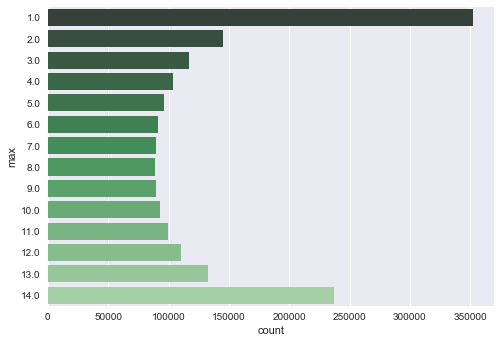

In [13]:
import seaborn as sns
sns.countplot(y='max', data=aud_wlagged, palette="Greens_d")

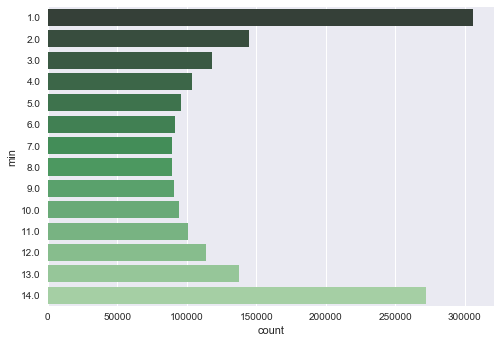

In [14]:
sns.countplot(y='min', data=aud_wlagged, palette="Greens_d")

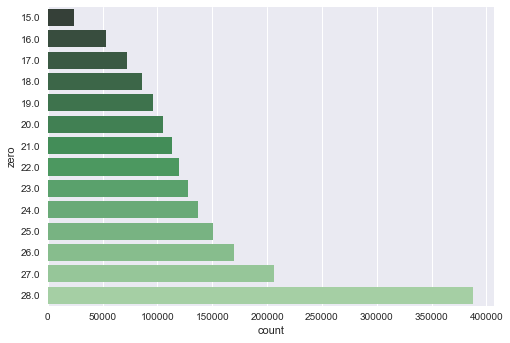

In [15]:
import seaborn as sns
sns.countplot(y='zero', data=aud_wlagged3, palette="Greens_d")

In [16]:
# regress how to tell whether it is going to be a max, a min, or closest to zero
# is there a reliable signal for what will be a max, a min, or closest to zero

In [17]:
aud_wlagged3[["time","returns", "std2", "std8", "std15","max", "min", "zero",]]


,time,returns,std2,std8,std15,max,min,zero
14,23:44,-0.000253,1.838478e-04,0.000096,0.000166,2.0,12.0,26.0
15,23:43,0.000165,1.202082e-04,0.000094,0.000153,1.0,13.0,27.0
16,23:42,0.000194,1.414214e-04,0.000114,0.000136,2.0,14.0,16.0
17,23:41,-0.000126,9.192388e-05,0.000115,0.000104,3.0,14.0,17.0
18,23:40,0.000243,1.767767e-04,0.000151,0.000115,4.0,14.0,18.0
19,23:39,0.000010,7.071068e-06,0.000175,0.000128,5.0,1.0,19.0
20,23:38,0.000185,1.343503e-04,0.000218,0.000170,6.0,1.0,20.0
21,23:37,-0.000039,2.828427e-05,0.000240,0.000194,7.0,1.0,21.0
22,23:36,-0.000136,9.899495e-05,0.000183,0.000199,8.0,2.0,22.0
23,23:35,-0.000175,1.272792e-04,0.000154,0.000197,9.0,3.0,17.0


In [23]:
import statsmodels.formula.api as sm
result = sm.ols(formula="max ~ returns + std2 + std8 + std15", data=aud_wlagged3).fit()
print result.params

Intercept       7.079306
returns      -146.401011
std2          404.017683
std8        -2472.631718
std15        1407.279978
dtype: float64


In [24]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                    max   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4570.
Date:                Thu, 06 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:44:58   Log-Likelihood:            -5.4926e+06
No. Observations:             1848366   AIC:                         1.099e+07
Df Residuals:                 1848361   BIC:                         1.099e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0793      0.004   1661.815      0.0

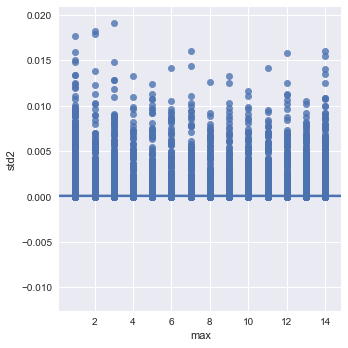

In [20]:
import seaborn as sns
sns.lmplot(x='max',y='std2',data=aud_wlagged3,fit_reg=True)

In [21]:
# project: data acquisition, pre processing, exploration, learning, evaluation (visualization), model/story/prediction/exploration


In [22]:
# how about if returns are positive or negative.. will that explain if returns min or max... doesnt really look like it